In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from efficient_apriori import apriori
#from mrjob.job import MRJob

In [39]:
data = pd.read_csv('data.csv')
data.head()

,rev_id,rev_user_text,rev_deleted,rev_page
0,1,Luis Oliveira,0,32978
1,5,Magnus Manske,0,36469
2,6,Magnus Manske,0,36469
3,8,Magnus Manske,0,36469
4,13,Manning Bartlett,0,25169208


In [40]:
file = open('users.txt','w+')
for user in np.unique(data['rev_user_text']):
    file.write(user + ": " )
    pages = []
    for page in np.unique(data[data['rev_user_text']==user]['rev_page']):
        pages.append(page)
    file.write(str(pages))
    file.write('\n')

In [41]:
edits_per_user = []

file = open('itemsets.txt','r+')
for line in file:
    line = line[:-1]
    user, pages = line.split('", ')
    pages = pages[:-1]
    pages = [page.replace(' ','') for page in pages.split(",")]

    user = user.replace('"', '')

    pages = tuple(pages)
    edits_per_user.append(pages)

## Efficient Apriori to generate rules

In [42]:
itemsets, rules = apriori(edits_per_user, min_support=0.01,  min_confidence=0.5,max_length=2)
for rule in rules:
    rule

## Vizualization of Apriori rules

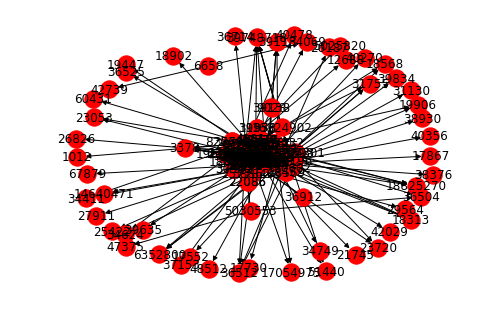

In [43]:
import networkx as nx

G = nx.DiGraph()

for i, rule in enumerate(rules):
    # nodes
    if i < 1000:
        G.add_node(str(rule.rhs[0]), size=1000*rule.support)
        G.add_node(str(rule.lhs[0]), size=1000*rule.support)
        G.add_path([str(rule.rhs[0]), str(rule.lhs[0])],weight=1000*rule.confidence)

H = G.to_directed()

nx.draw(G, with_labels=True)
plt.savefig("rule_figure.pdf")

## Time co

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


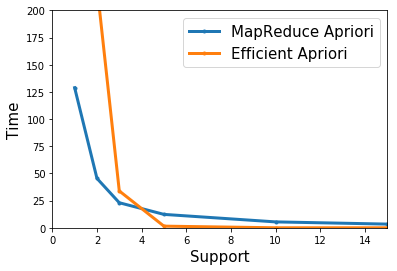

In [35]:
data = pd.read_csv('result2.csv')
data['time_eff_reduce'][13] = 1000

eff = [float(i) for i in data['time_eff_reduce']]
rep = [float(i) for i in data['time_map_reduce']]

plt.plot(data['Support'], rep, '.-',label='MapReduce Apriori', linewidth = 3)
plt.plot(data['Support'], eff, '.-',label='Efficient Apriori', linewidth = 3)
plt.xlabel('Support', fontsize = 15)
plt.ylabel('Time', fontsize = 15)
plt.legend(fontsize = 15, fancybox = True, frameon=True, facecolor ='white')
plt.xlim([0,15])
plt.ylim([0,200])
plt.savefig("comparison_figure.pdf")
plt.show()

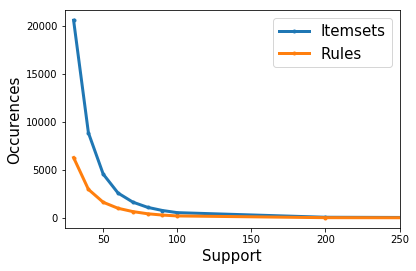

In [34]:
data = pd.read_csv('tests/results.csv')
data.head()

itemsets = [float(i) for i in data['itemsets']]
rules = [float(i) for i in data['rules']]
support = [float(i) for i in data['support abs']]

plt.plot(support, itemsets, '.-',label='Itemsets', linewidth = 3)
plt.plot(support, rules, '.-',label='Rules', linewidth = 3)
plt.xlabel('Support', fontsize = 15)
plt.ylabel('Occurences', fontsize = 15)
plt.legend(fontsize = 15, fancybox = True, frameon=True, facecolor ='white')
plt.xlim([24,250])
#plt.ylim([0,200])
plt.savefig("itemsets_figure.pdf")
plt.show()